# Clasificación de datos posterior al agrupamiento

Utilizar un arbol de decisión para determinar las variables más importantes para el clustering y la precisión del modelo

## Carga de datos

In [1]:
import os
import sys
import pandas as pd
import numpy as np
%pip install -q ipywidgets
import ipywidgets as widgets

directorio = '../Results'
# directorio = '/content'

# Leer archivos xlsx dentro de la carpeta Results de manera recursiva
files = []
for r, d, f in os.walk(directorio):
  for file in f:
    if '.xlsx' in file:
      files.append(os.path.join(r, file))


# Seleccionar archivo a leer
dropdown = widgets.Dropdown(
  options=[('Seleccionar archivo', None)] + [(f, f) for f in files],
  description='Archivo:',
  disabled=False,
)
nombre_archivo = '';
def on_change(change):
  if change['type'] == 'change' and change['name'] == 'value':
    if change['new'] is not None:
      global nombre_archivo
      global X
      global y
      nombre_archivo = change['new']
      print('Archivo seleccionado:', nombre_archivo)
      ruta = os.path.join(directorio, nombre_archivo)

      # Data split y seleccion de modelos
      dataset = pd.read_excel(ruta)

      X = dataset.drop(columns=['cluster_kmeans', 'cluster_hc', 'Comunidad'])
      y = dataset['cluster_kmeans']
      display(X.head())
      display(y.head())
dropdown.observe(on_change)
display(dropdown)

Note: you may need to restart the kernel to use updated packages.


Dropdown(description='Archivo:', options=(('Seleccionar archivo', None), ('../Results\\00-clusters-original-co…

Archivo seleccionado: ../Results\04-clusters-limpio-con-categoricos\clusters.xlsx


,carrera,Espacio_Académico,alumnos,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,1p_porcentaje_evidencias_calificadas,1p_total_actividades_calificadas,1p_total_actividades_entregadas,1p_porcentaje_evidencias_calificadas_tiempo,1p_total_actividades_calificadas_tiempo,...,2p_porcentaje_evidencias_calificadas,2p_total_actividades_calificadas,2p_total_actividades_entregadas,2p_porcentaje_evidencias_calificadas_tiempo,2p_total_actividades_calificadas_tiempo,2p_porcentaje_aprobados,total_actividades_calificadas,trabajos_por_calificar,correos_enviados,correos_recibidos
0,Ingeniería en Computación,Valle de Chalco,25,18,18,1.0,438,438.0,0.998,437.0,...,1.0,452.0,452.0,1.0,452.0,0,890.0,0.0,5.75,2.25
1,Ingeniería en Computación,Valle de Chalco,23,19,19,1.0,402,402.0,1.000,402.0,...,1.0,380.0,380.0,1.0,380.0,0,782.0,0.0,43.00,17.00
2,Ingeniería en Computación (2019),CU Texcoco,43,5,5,1.0,131,131.0,1.000,131.0,...,0.0,0.0,0.0,0.0,0.0,0,131.0,0.0,7.50,2.50
3,Ingeniería en Computación (2019),CU Texcoco,16,6,6,1.0,89,89.0,1.000,89.0,...,1.0,139.0,139.0,1.0,139.0,81,228.0,0.0,21.00,18.00
4,Ingeniería en Computación (2019),CU Texcoco,20,6,6,1.0,102,102.0,1.000,102.0,...,1.0,137.0,137.0,1.0,137.0,50,239.0,0.0,20.75,13.25


0    3
1    3
2    1
3    2
4    2
Name: cluster_kmeans, dtype: int64

Archivo seleccionado: ../Results\00-clusters-original-con-categoricos\clusters.xlsx


,carrera,No.,Asesor,Espacio_Académico,Bloque,Grupo,alumnos,1er_P_Ponderación-semanas,1p_total_actividades_asignadas,1p_total_actividades_evaluativas,...,Porcentaje-Eficiencia-Terminal,Aprobados,correos_enviados,correos_recibidos,Aprobados ordinario,Aprobados extraordinario,Aprobados título,Asesoría académica Respondidas/Recibidas,Histórico de chat personal,Histórico de socializa por comunidad
0,Ingeniería en Computación,1,0,Valle de Chalco,0,O5,35,100\4,17,17,...,0,0,0,1,0,0,0,0\0,0,0
1,Ingeniería en Computación,2,0,Valle de Chalco,0,OB,25,60\6,18,18,...,0,0,0,0,0,0,0,0\0,0,0
2,Ingeniería en Computación,3,0,Valle de Chalco,0,O6,23,60\6,19,19,...,0,0,0,0,0,0,0,0\0,0,0
3,Ingeniería en Computación,4,0,Valle de Chalco,0,OA,37,100\5,24,22,...,0,0,0,0,0,0,0,0\0,0,0
4,Ingeniería en Computación (2019),1,0,CU Texcoco,0,D4,50,9\9,19,18,...,0,0,0,0,0,0,0,0\0,0,0


0    3
1    3
2    3
3    3
4    3
Name: cluster_kmeans, dtype: int64

## Modelo

cluster_kmeans
1    893
2    782
3     98
Name: count, dtype: int64


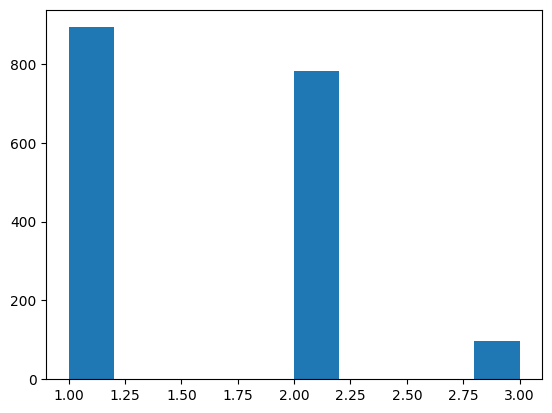

In [5]:
# Ver balance de clases
print(y.value_counts())
# histograma de clases

import matplotlib.pyplot as plt
plt.hist(y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identificar variables categóricas y numéricas
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Exactitud: 0.9746478873239437
Precisión: 0.97491253829282


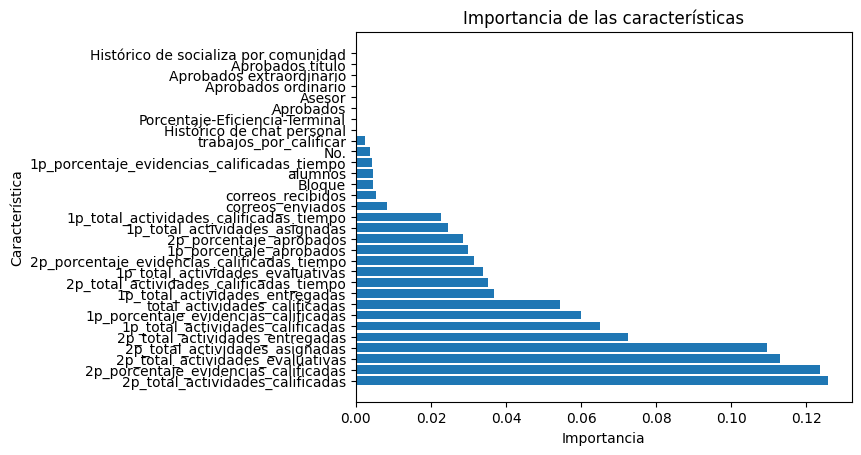

In [7]:
# import plotly.express as px
# usando matplotlib
import matplotlib.pyplot as plt


# variables mas importantes
from sklearn.ensemble import RandomForestClassifier
# grid search para encontrar los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

def random_forest(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Crear el modelo de bosque aleatorio
  rf = RandomForestClassifier(random_state=42)

  # Definir la cuadrícula de búsqueda
  param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
  }

  # Realizar la búsqueda en la cuadrícula
  grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
  grid_search.fit(X_train, y_train)

  # Obtener los mejores hiperparámetros

  best_params = grid_search.best_params_
  print('Mejores hiperparámetros:', best_params)

  # Crear un modelo con los mejores hiperparámetros
  rf_best = RandomForestClassifier(random_state=42, **best_params)

  # Entrenar el modelo
  rf_best.fit(X_train, y_train)

  # ver la exactitud y precisión

  from sklearn.metrics import accuracy_score, precision_score

  # Predecir los datos de prueba
  y_pred = rf_best.predict(X_test)

  # Calcular la exactitud
  accuracy = accuracy_score(y_test, y_pred)
  print('Exactitud:', accuracy)

  # Calcular la precisión
  precision = precision_score(y_test, y_pred, average='weighted')
  print('Precisión:', precision)


  # Obtener la importancia de las características
  feature_importances = pd.DataFrame({'feature': numerical_features, 'importance': rf_best.feature_importances_})
  feature_importances = feature_importances.sort_values('importance', ascending=False)

  # Graficar las características más importantes
  fig, ax = plt.subplots()
  ax.barh(feature_importances['feature'], feature_importances['importance'])
  ax.set_xlabel('Importancia')
  ax.set_ylabel('Característica')
  ax.set_title('Importancia de las características')
  plt.show()

random_forest(X[numerical_features], y)

In [ ]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# importar pipeline, column transformer y gridsearch
# from sklearn.pipeline import Pipeline
%pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# from sklearn.impute import SimpleImputer ya no es necesario por que l
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

def decision_tree(X, y):
  # Crear un pipeline para preprocesar los datos
  numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])
  categorical_transformer = Pipeline(
      steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
  )

  # Combinar los preprocesadores
  preprocessor = ColumnTransformer(
      transformers=[
          ("num", numerical_transformer, numerical_features),
          ("cat", categorical_transformer, categorical_features),
      ]
  )

  pipeline = Pipeline(
      steps=[
          ("preprocessor", preprocessor),
          ("smote", SMOTE(sampling_strategy="auto", random_state=42)),
          ("classifier", DecisionTreeClassifier(random_state=42)),
      ]
  )

  # Definir los hiperparámetros a buscar
  param_grid = {
      "classifier__max_depth": [1, 2, 3, 4, 5, 7, 9, 10, 12, 14, 15, 20],
      "classifier__min_samples_split": [2, 5, 10],
  }

  # Definir el esquema de validación cruzada (StratifiedKFold)
  kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # Realizar la búsqueda en cuadrícula con validación cruzada en el pipeline
  grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring="accuracy")

  # Ajustar los datos usando GridSearchCV
  grid_search.fit(X_train, y_train)

  
  # Obtener el mejor modelo
  best_model = grid_search.best_estimator_

  # Ajustar el mejor modelo en los datos de entrenamiento
  best_model.fit(X_train, y_train)

  # Imprimir los mejores hiperparámetros
  best_params = grid_search.best_params_
  print("Best Hyperparameters:\n", best_params, '\n')

  # Predecir los datos de prueba
  y_pred = best_model.predict(X_test)

  # Calcular la precisión
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy, '\n')

  # Calcular la precisión
  precision = precision_score(y_test, y_pred, average='weighted')
  print("Precision:", precision, '\n')

  # Calcular el reporte de clasificación
  class_report = classification_report(y_test, y_pred)
  print("Classification Report:\n", class_report)

  # Calcular la matriz de confusión
  conf_matrix = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
  disp.plot()

  
  # usando los mejores hiperparámetros
  max_depth = best_params['classifier__max_depth']
  min_samples_split = best_params['classifier__min_samples_split']
  clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  preprocessor = ColumnTransformer(
    transformers=[
      ('num', numerical_transformer, numerical_features),
      ('cat', categorical_transformer, categorical_features)
    ])

  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('classifier', clf)
  ])

  # Calcular la precisión usando validación cruzada
  scores = cross_val_score(pipeline, X, y, cv=stratified_kfold, scoring='accuracy')

  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

  # Matriz de confusión
  from sklearn.metrics import ConfusionMatrixDisplay
  import matplotlib.pyplot as plt
  # X_train, X_test, y_train, y_test 
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
  disp.plot()

  plt.show()

  # Obtenemos las variables más importantes
  importances = best_model.named_steps['classifier'].feature_importances_

  # Ordenamos las importancias de mayor a menor
  indices = np.argsort(importances)[::-1]

  # Obtenemos los nombres de las columnas
  columnas = X_train.columns
  display(columnas)
  # Mostramos las 10 variables más importantes
  for i in range(5):
      print(f"{columnas[indices[i]]}: {importances[indices[i]]}")


decision_tree(X, y)
